### Sales Analysis

Dune is a reputable global retailer offering a diverse selection of products, including accessories, clothing, and phones. With a growing presence in 14 countries and a team of over 70,000 employees, the company prides itself on providing affordable options for everyone. From fashion-foward trendsetters to multi-generational families, Dune strive to offer great quality essentials and standout style that cater to a wide range of customers. 

As a newly appointed Data Scientist, your first task is to analyze the company's sales data from the previous year and provode actionable insights and recommendations. This analysis will help identify areas of opportunity and inform future business decisions aimed at improving performance and increasing profitablity. 

### Exploratory Data Analysis

Exploratory Data Analysis (EDA) is the process of analyzing and summarizing data in order to gain insights and understanding of the underlying patterns and relationships. The main objective of EDA is to identify and explore the main characteristics and patters of the data, and to identify any anomalies or outliers that may impact subsequent analysis.

EDA typically involves a number of steps, including 

1. **Data cleaning** - Data cleaning involves removing or correcting any errors or inconsistencies in the data, such as missing values or incorrect values. 
2. **Data visualization** - Data visualisation techniques are then used to graphically represent the data and identify any trends or patterns.
3. **Statistical analysis** - Statistical analysis is used to identify any relationships between variables and to test hypotheses about the data. This may involve calculating summary statistics such as mean and standard deviation, and performing tests such as correlation analysis and hypothesis testing. 

In [171]:
# Import libraries

import pandas as pd # Data Preprocessing
import matplotlib.pyplot as plt # Data Visualization
import seaborn as sns # Data Visualization
import missingno as msno # Missing data - Data Visualization
from collections import Counter # Counting
import numpy as np

In [256]:
# load the dataset

df = pd.read_csv(r"C:\Users\User\Downloads\Dune Sales Data.csv")

In [257]:
df.isnull().sum()

Date                1
Customer            1
Sales Person        1
Customer_Age        0
Customer_Gender     1
State               1
Product_Category    1
Sub_Category        1
Payment Option      1
Quantity            1
Unit_Cost           1
Unit_Price          1
dtype: int64

In [259]:
# Print the top rows

df.head() # Top 5 rows by default

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price
0,19-Feb-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.00,109.00
1,20-Feb-16,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.50,28.50
2,27-Feb-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,3.67,5.00
3,12-Mar-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,2.0,87.50,116.50
4,12-Mar-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,35.00,41.67


In [260]:
# Print the bottom rows

df.tail() # Bottom 5 rows by default

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price
34862,7-Feb-16,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,2.0,1160.0,985.50
34863,13-Mar-15,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,1.0,2049.0,1583.00
34864,5-Apr-15,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,3.0,683.0,560.67
34865,30-Aug-15,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,1.0,2320.0,1568.00
34866,NaN,NaN,NaN,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [261]:
# Dimensionality of the data - The number of rows and columns
df.shape

(34867, 12)

In [262]:
# Examine the columns/features of the data
df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price'],
      dtype='object')

In [263]:
# Investigate the dataset for annomalies and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34867 entries, 0 to 34866
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              34866 non-null  object 
 1   Customer          34866 non-null  object 
 2   Sales Person      34866 non-null  object 
 3   Customer_Age      34867 non-null  int64  
 4   Customer_Gender   34866 non-null  object 
 5   State             34866 non-null  object 
 6   Product_Category  34866 non-null  object 
 7   Sub_Category      34866 non-null  object 
 8   Payment Option    34866 non-null  object 
 9   Quantity          34866 non-null  float64
 10  Unit_Cost         34866 non-null  float64
 11  Unit_Price        34866 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 3.2+ MB


 **Columns** are also regarded as **features** in data science

    Object - Object represents a categorical data
    Integer - int64 reprrsents numbers
    floats - floats64 represents a decemal numbers

In [189]:
# Numerical Statistical Analysis
df.describe() # This is only looking/exploring the numerical columns

,Customer_Age,Quantity,Unit_Cost,Unit_Price
count,34866.000000,34866.000000,34866.000000,34866.000000
mean,36.382636,2.002524,349.880567,389.232473
std,11.112969,0.813936,490.015846,525.319097
min,17.000000,1.000000,0.670000,0.670000
25%,28.000000,1.000000,45.000000,53.670000
50%,35.000000,2.000000,150.000000,179.000000
75%,44.000000,3.000000,455.000000,521.000000
max,87.000000,3.000000,3240.000000,5082.000000


In [190]:
# Categorical Statistical Analysis

df.describe(include=["object", "bool"]) # This is only looking/exploring the datas that are in categories

,Date,Customer,Sales Person,Customer_Gender,State,Product_Category,Sub_Category,Payment Option
count,34866,34866,34866,34866,34866,34866,34866,34866
unique,576,4,7,2,36,3,17,3
top,1-Mar-16,Low,Remota,F,Lagos,Accessories,Keyboard,Cash
freq,196,13041,6667,17439,10332,22534,11112,15911


### Dealing with missing data

    1. MCAR (Missing completely at random): These are values that are randomly missing and do not depend on any other values. 
    2. MAR (Missing at random): These values are dependent on some additional features. 
    3. MNAR (Missing not a random): There is a reason behind why these values are missing.
There are several methods of imputing missing data, including the measure of Central Tendency, regression imputataion, and multiple imputation. measure of Central Tendency involves replacing missing values with either the Mean, Median and Mode of the variable, while regression imputation involves using other variables in the dataset to predict missing values. 

In [258]:
# Investigate the missing data

null_vals = df.isnull().sum()
null_vals

Date                1
Customer            1
Sales Person        1
Customer_Age        0
Customer_Gender     1
State               1
Product_Category    1
Sub_Category        1
Payment Option      1
Quantity            1
Unit_Cost           1
Unit_Price          1
dtype: int64

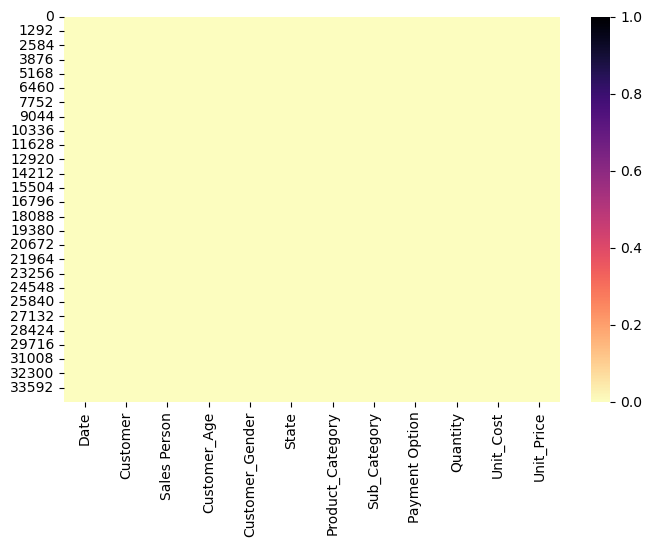

In [264]:
# Visualize the missing data
plt.figure(figsize = (8,5))
sns.heatmap(df.isnull(), cbar=True, cmap="magma_r");

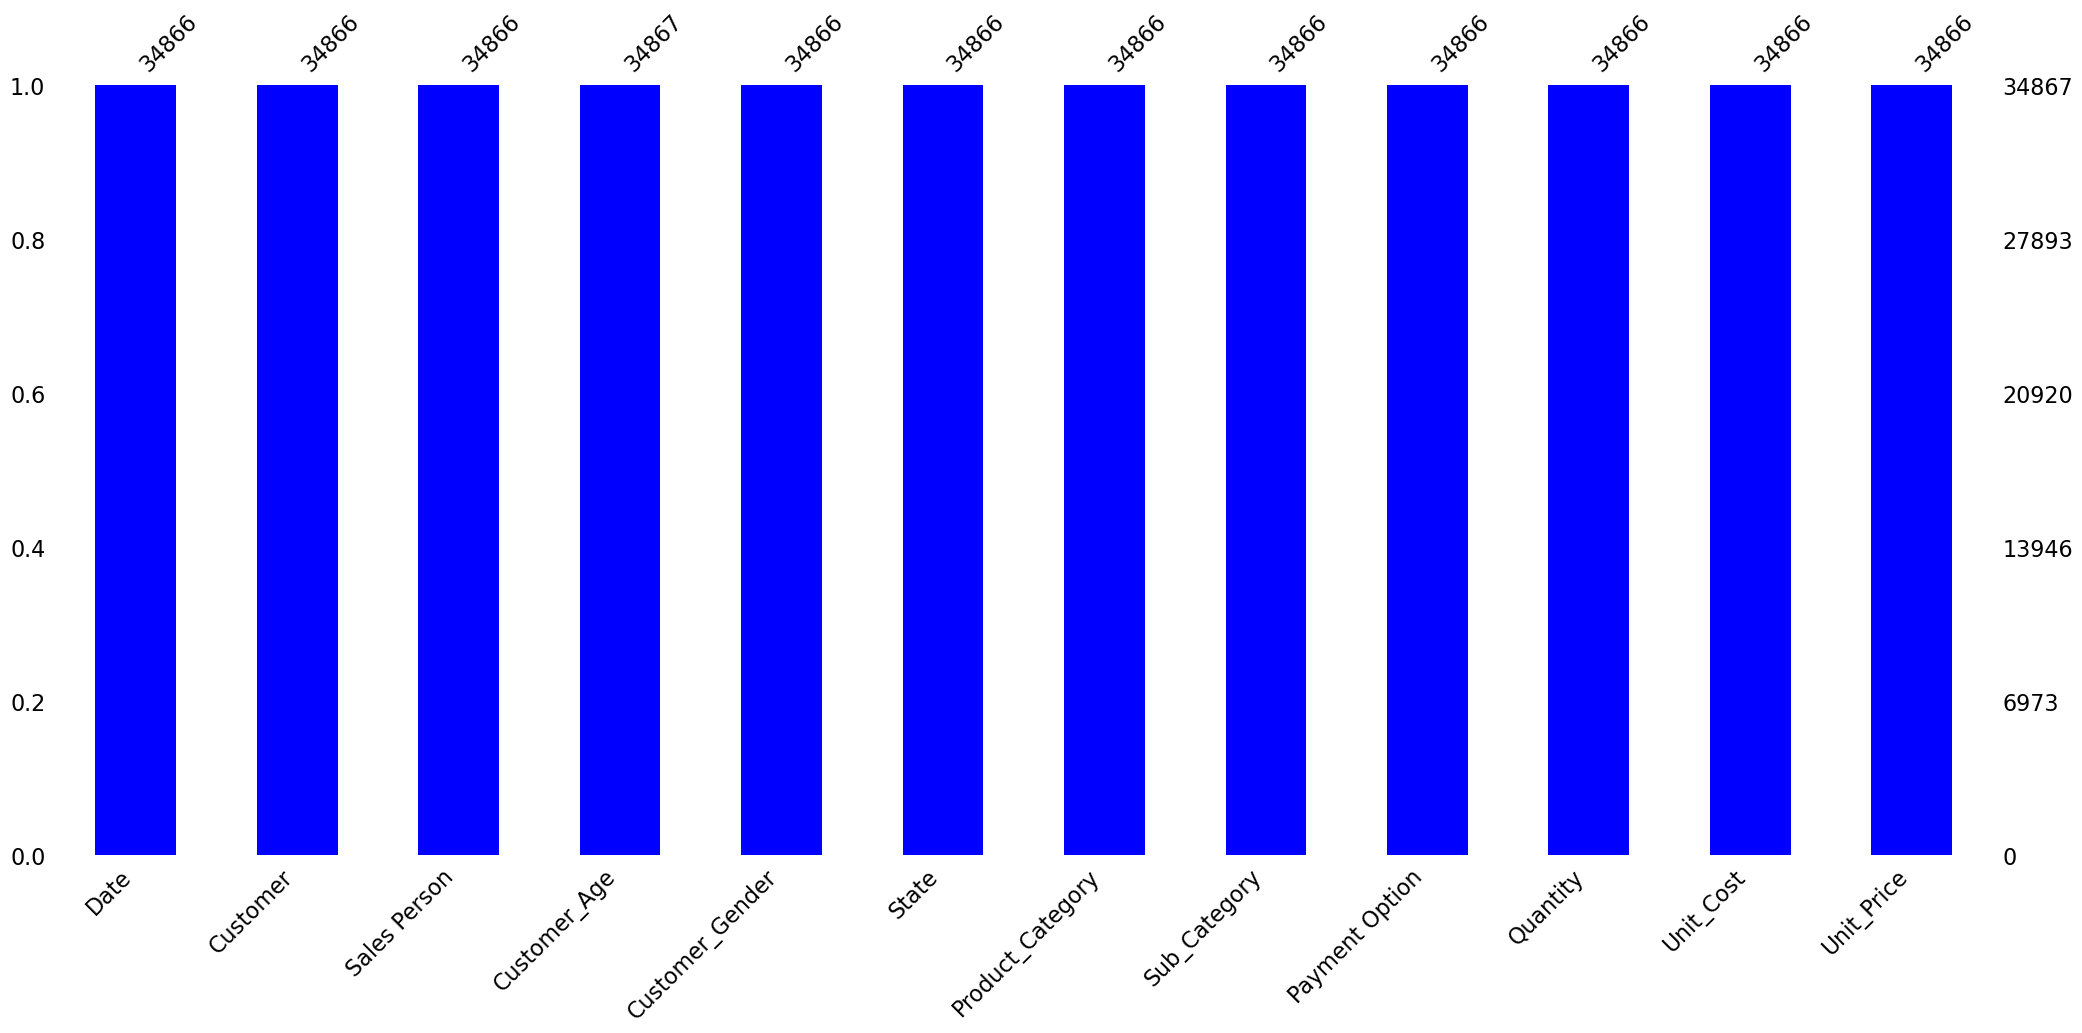

In [265]:
# Another way to visualise missing data
msno.bar(df, color="blue");

In [194]:
# Display where the missing data exist in the data
df.isnull()

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
34861,False,False,False,False,False,False,False,False,False,False,False,False
34862,False,False,False,False,False,False,False,False,False,False,False,False
34863,False,False,False,False,False,False,False,False,False,False,False,False
34864,False,False,False,False,False,False,False,False,False,False,False,False


In [266]:
# Display where the missing data exist in the data - going further
df[df.isnull().any(axis=1)]

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price
34866,NaN,NaN,NaN,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [267]:
# Drop the missing data
df.dropna(inplace=True)

In [268]:
df.isnull().sum()

Date                0
Customer            0
Sales Person        0
Customer_Age        0
Customer_Gender     0
State               0
Product_Category    0
Sub_Category        0
Payment Option      0
Quantity            0
Unit_Cost           0
Unit_Price          0
dtype: int64

In [269]:
# Datatime Analysis
df.head(2)

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price
0,19-Feb-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.0,109.0
1,20-Feb-16,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.5,28.5


In [273]:
# convert the data column into a pandas date object
df["Date"] = pd.to_datetime(df["Date"], format='%Y-%m-%d')

# Extract the year, month, quarter
df["year"] = df["Date"].dt.year
df["month"] = df["Date"].dt.month
df["month_name"] = df["Date"].dt.month_name()
df["quarter"] = df["Date"].dt.quarter

df.head(2)

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price,year,month,month_name,quarter
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.0,109.0,2016,2,February,1
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.5,28.5,2016,2,February,1


In [274]:
# Group Customer age
def age_group(x):
    if x <= 25:
        return "<=25 Young Adult"
    elif x <= 40:
        return "25-40 Adult"
    elif x <= 50:
        return "41-50 Old Adult"
    else:
        return ">=51 Elder"

# Apply function to the data
df["age_group"] = df["Customer_Age"].apply(age_group)
df

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price,year,month,month_name,quarter,age_group
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.00,109.00,2016,2,February,1,25-40 Adult
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.50,28.50,2016,2,February,1,25-40 Adult
2,2016-02-27,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,3.67,5.00,2016,2,February,1,25-40 Adult
3,2016-03-12,High,Segun,29,F,Abia,Accessories,Keyboard,Online,2.0,87.50,116.50,2016,3,March,1,25-40 Adult
4,2016-03-12,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,35.00,41.67,2016,3,March,1,25-40 Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34861,2015-03-22,High,Kenny,37,M,Kebbi,Phones,IPhone,Online,1.0,2049.00,1487.00,2015,3,March,1,25-40 Adult
34862,2016-02-07,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,2.0,1160.00,985.50,2016,2,February,1,25-40 Adult
34863,2015-03-13,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,1.0,2049.00,1583.00,2015,3,March,1,25-40 Adult
34864,2015-04-05,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,3.0,683.00,560.67,2015,4,April,2,25-40 Adult


In [275]:
# Cost, Revenue and Profit calculations
df["cost"] = df["Quantity"]*df["Unit_Cost"]
df["revenue"] = df["Quantity"]*df["Unit_Price"]
df["profit"] = df["revenue"] - df["cost"]

df.head(2)

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price,year,month,month_name,quarter,age_group,cost,revenue,profit
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.0,109.0,2016,2,February,1,25-40 Adult,80.0,109.0,29.0
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.5,28.5,2016,2,February,1,25-40 Adult,49.0,57.0,8.0


In [276]:
# Profit/Loss grouping 
def porl(x):
    if x >= 0:
        return "profit"
    else:
        return "Loss"

df["profit_label"] = df['profit'].apply(porl)
df.head(2)

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,...,Unit_Price,year,month,month_name,quarter,age_group,cost,revenue,profit,profit_label
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,...,109.0,2016,2,February,1,25-40 Adult,80.0,109.0,29.0,profit
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,...,28.5,2016,2,February,1,25-40 Adult,49.0,57.0,8.0,profit


### Univariate Analysis

Univariate analysis involves analyzing the distribution and summary statistics of individual variables/column/feature.

    _ Numerical Column/Features = Numerical Visualization Techniques
    _ Categorical Column/Feature = Categorical Visualization Techniques

#### Categorical Data Visualization

In [203]:
df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price', 'age_group', 'cost', 'revenue',
       'profit', 'profit_label'],
      dtype='object')

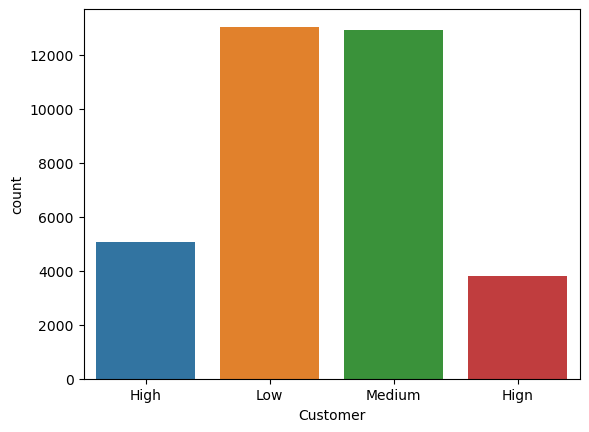

In [277]:
# How customers below to each customer spec
sns.countplot(x="Customer", data=df);

In [278]:
# Investigate the columns affected
df[df["Customer"] == "Hign"]. head(3)

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,...,Unit_Price,year,month,month_name,quarter,age_group,cost,revenue,profit,profit_label
29770,2015-08-03,Hign,Derick,28,F,Lagos,Phones,IPhone,Cash,1.0,...,2136.00,2015,8,August,3,25-40 Adult,2295.00,2136.00,-159.0,Loss
29771,2015-08-04,Hign,Derick,28,F,Lagos,Accessories,Keyboard,Cash,2.0,...,19.50,2015,8,August,3,25-40 Adult,35.00,39.00,4.0,profit
29772,2015-08-04,Hign,Derick,28,F,Lagos,Accessories,Keyboard,Cash,3.0,...,18.67,2015,8,August,3,25-40 Adult,50.01,56.01,6.0,profit


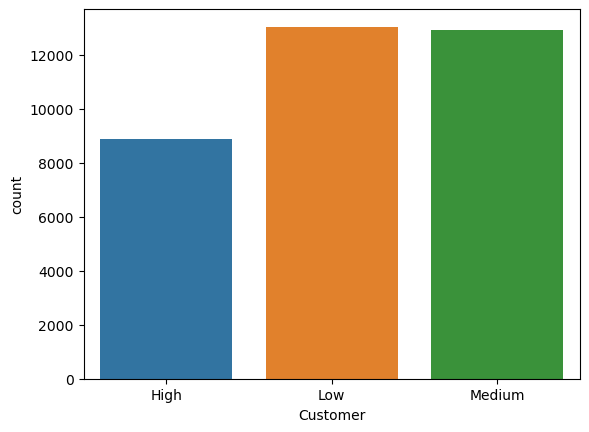

In [279]:
# Correct the spelling of HIGN
df.loc[df["Customer"] == "Hign", "Customer"] = "High"
sns.countplot(x="Customer", data=df);

In [280]:
# Trying to know or check the count of the above graph. 
df["Customer"]. value_counts()

Customer
Low       13041
Medium    12926
High       8899
Name: count, dtype: int64

In [281]:
df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price', 'year', 'month', 'month_name',
       'quarter', 'age_group', 'cost', 'revenue', 'profit', 'profit_label'],
      dtype='object')

###### Narration about your observations

<Axes: xlabel='Sales Person', ylabel='count'>

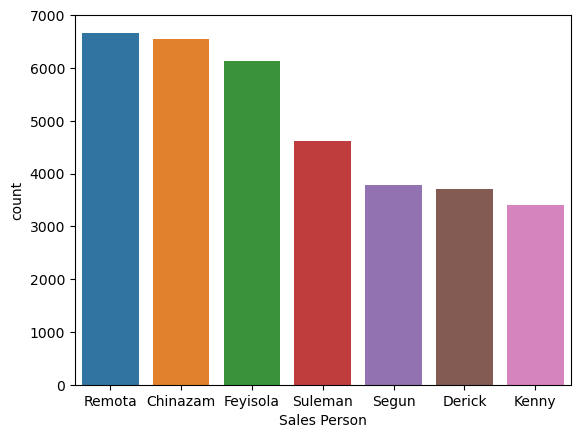

In [282]:
# Sales Person - How many transaction by sales person

ax = sns.countplot(x=df["Sales Person"], order=df["Sales Person"].value_counts(ascending=False).index)
ax

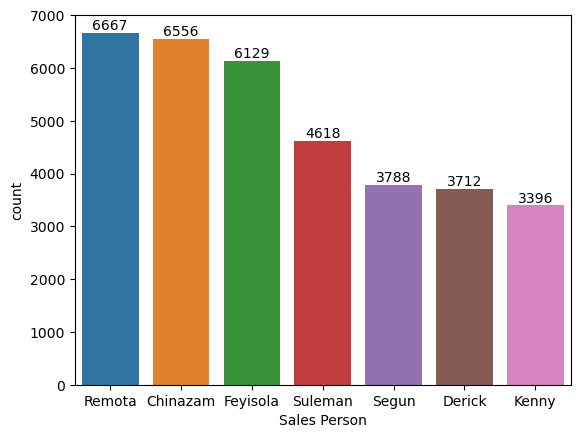

In [283]:
# Sales Person - How many transaction by sales person

ax = sns.countplot(x=df["Sales Person"], order=df["Sales Person"].value_counts(ascending=False).index)
values = df["Sales Person"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);

###### Narration about your observations

In [211]:
df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price', 'age_group', 'cost', 'revenue',
       'profit', 'profit_label'],
      dtype='object')

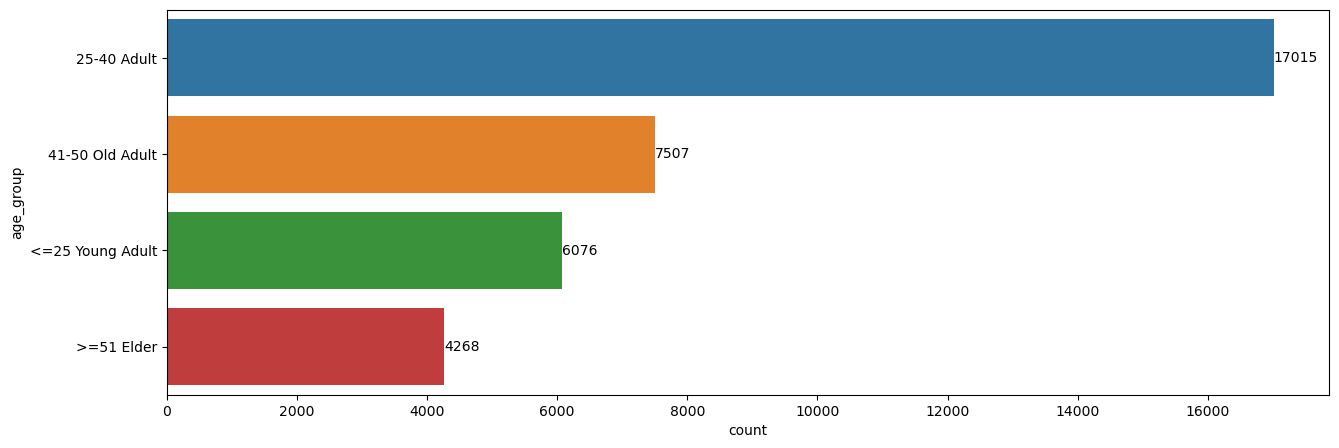

In [212]:
# Total transaction by customer Age Group
plt.figure(figsize=(15,5))

ax = sns.countplot(y=df["age_group"], order=df["age_group"].value_counts(ascending=False).index)
values = df["age_group"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);

In [213]:
###### Narration about your observations

In [214]:
df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price', 'age_group', 'cost', 'revenue',
       'profit', 'profit_label'],
      dtype='object')

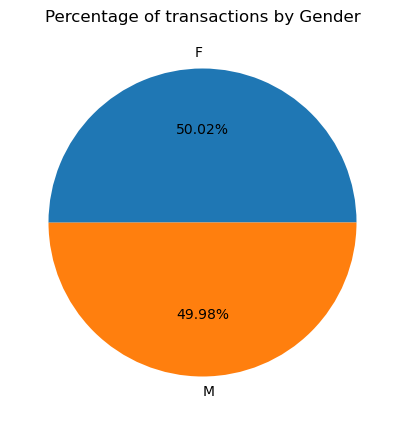

In [215]:
# Total transaction by Customer Gender

fig,ax = plt.subplots(figsize=(5,5))
count = Counter(df["Customer_Gender"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
ax.set_title("Percentage of transactions by Gender")
plt.show();

###### Narration about your observations

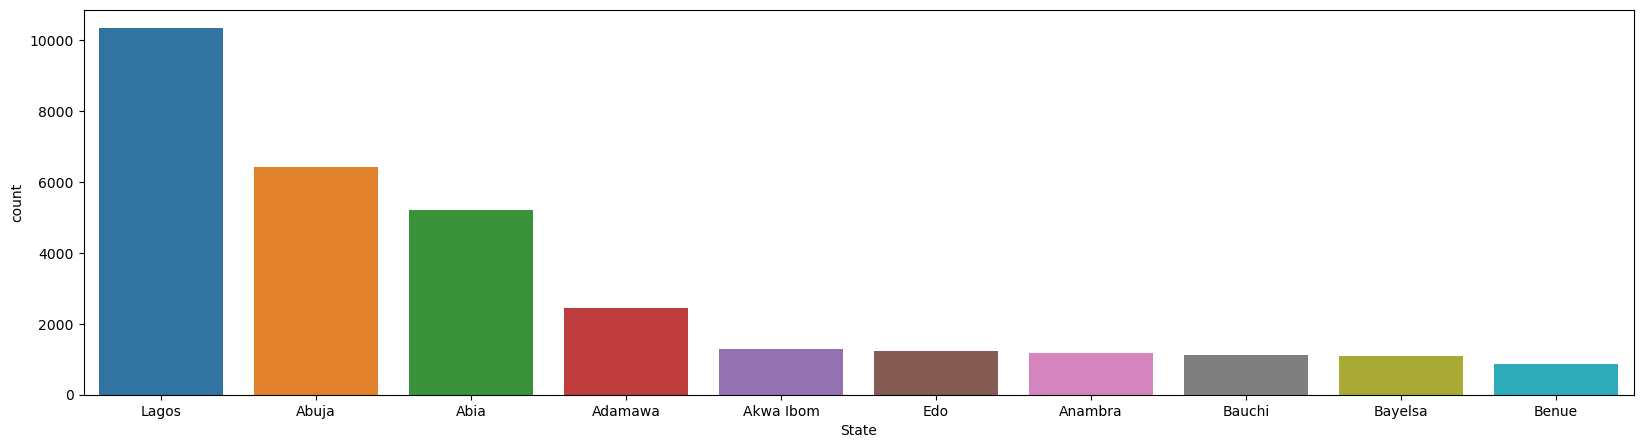

In [216]:
# Total 10 transaction by state
plt.figure(figsize=(20,5))

topten = df["State"].value_counts().head(10) # listing the top ten 

sns.countplot(x="State", data=df, order=topten.index);

In [217]:
df["State"].value_counts().head(10)

State
Lagos        10332
Abuja         6421
Abia          5206
Adamawa       2446
Akwa Ibom     1287
Edo           1229
Anambra       1171
Bauchi        1112
Bayelsa       1092
Benue          869
Name: count, dtype: int64

#### Assignemt 
- Product Catergory
- Sub Category
- Payment Option
- Month Name

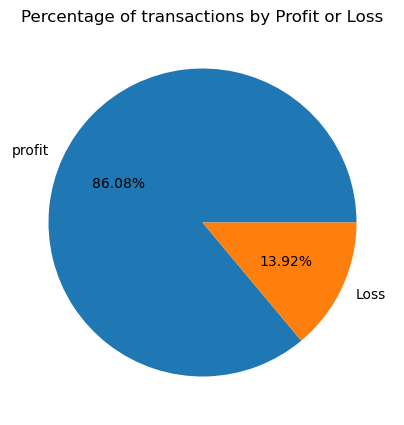

In [218]:
# Total transaction by Profit or Loss

fig,ax = plt.subplots(figsize=(5,5))
count = Counter(df["profit_label"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
ax.set_title("Percentage of transactions by Profit or Loss")
plt.show();

###### Narration about your observations

In [219]:
df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price', 'age_group', 'cost', 'revenue',
       'profit', 'profit_label'],
      dtype='object')

#### Numerical Data Visualization

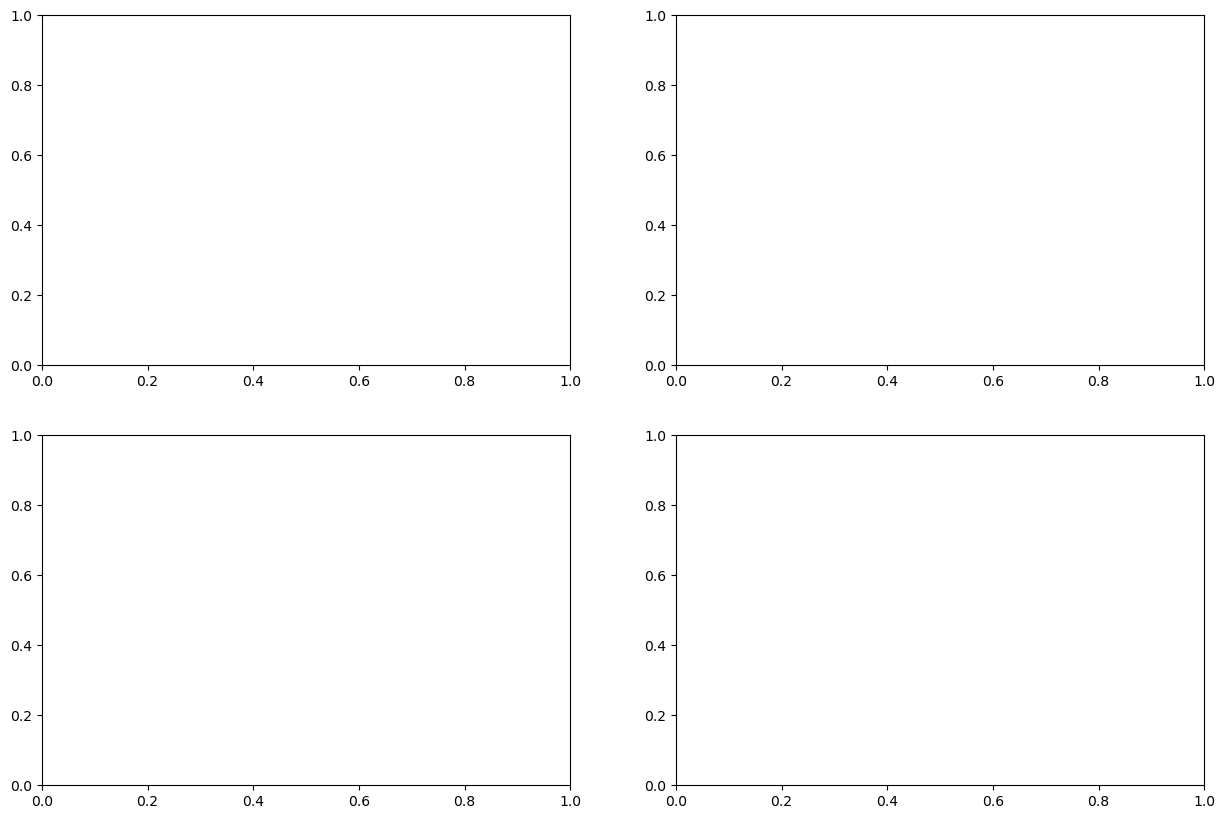

In [220]:
# Quantity, Cost, Revenue and Profit - Subplot

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

In [302]:
# To clear warnings

import warnings
warnings.filterwarnings("ignore")

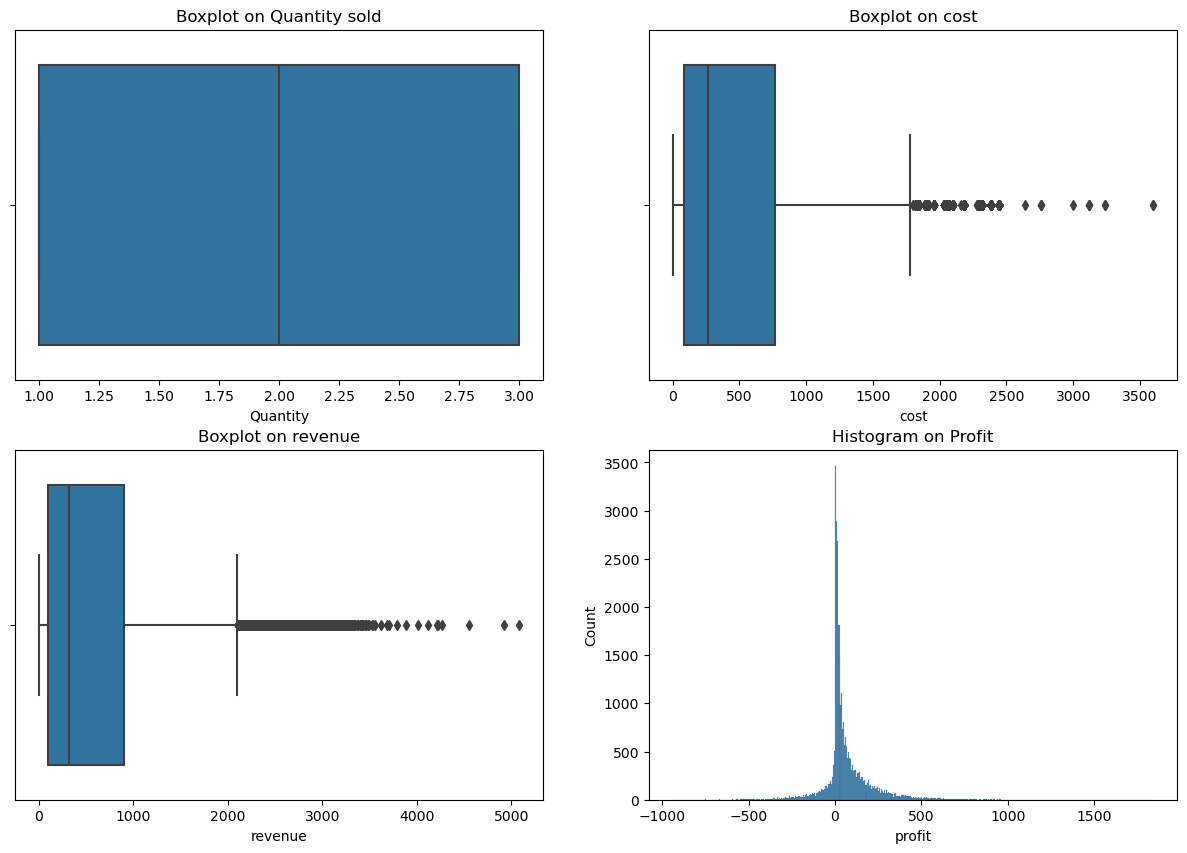

In [303]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

sns.boxplot(x="Quantity", data=df, ax=axs[0,0])
axs[0,0].set_title("Boxplot on Quantity sold")

sns.boxplot(x="cost", data=df, ax=axs[0,1])
axs[0,1].set_title("Boxplot on cost")

sns.boxplot(x="revenue", data=df, ax=axs[1,0])
axs[1,0].set_title("Boxplot on revenue")

sns.histplot(x="profit", data=df, ax=axs[1,1])
axs[1,1].set_title("Histogram on Profit");

###### Narration about your observations

### Bivariate Analysis

This involves analyzing the relationship between two variables. eg (Male & Female)

    - Focus on profit

In [222]:
df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price', 'age_group', 'cost', 'revenue',
       'profit', 'profit_label'],
      dtype='object')

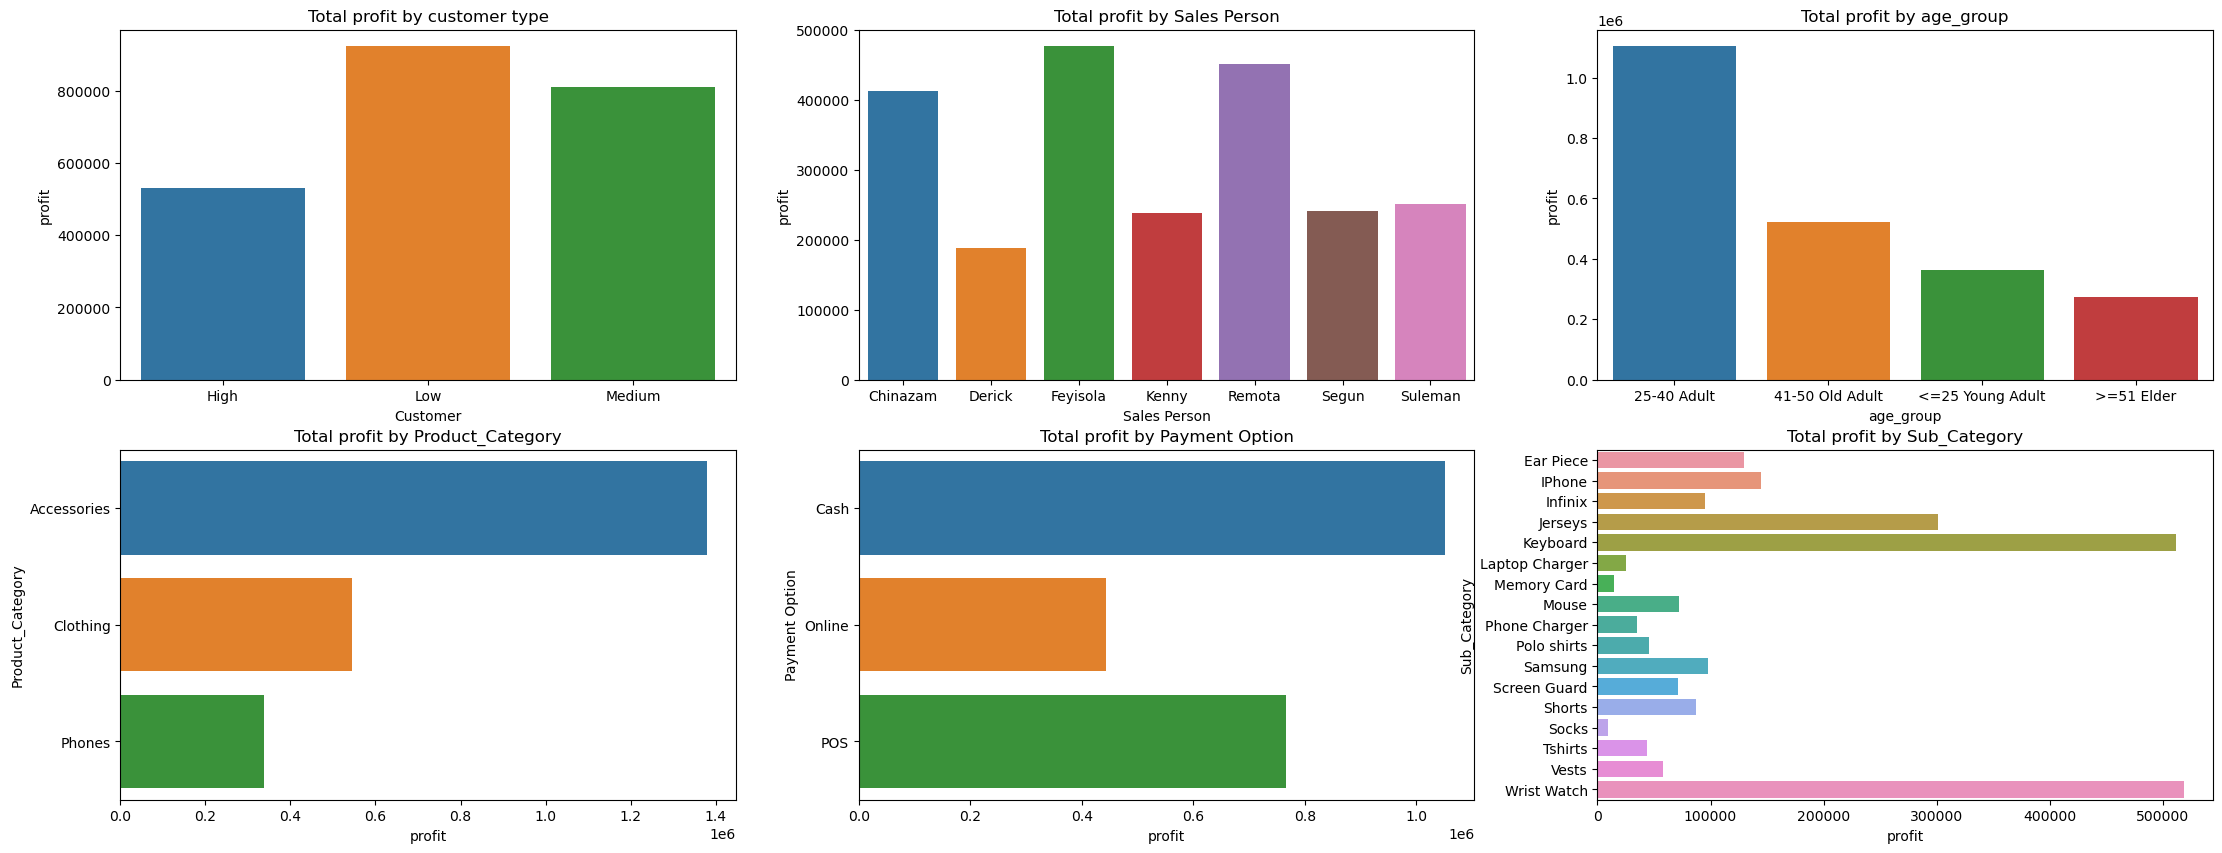

In [223]:
# Categorical Columns

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(27,10))

cust_prof = df.groupby("Customer")["profit"].sum().reset_index()
sns.barplot(x='Customer', data=cust_prof, y='profit', ax=axs[0,0])
axs[0,0].set_title("Total profit by customer type")

sp_prof = df.groupby("Sales Person")["profit"].sum().reset_index()
sns.barplot(x='Sales Person', data=sp_prof, y='profit', ax=axs[0,1])
axs[0,1].set_title("Total profit by Sales Person")

ag_prof = df.groupby("age_group")["profit"].sum().reset_index()
sns.barplot(x='age_group', data=ag_prof, y='profit', ax=axs[0,2])
axs[0,2].set_title("Total profit by age_group")

pc_prof = df.groupby("Product_Category")["profit"].sum().reset_index()
sns.barplot(y='Product_Category', data=pc_prof, x='profit', ax=axs[1,0])
axs[1,0].set_title("Total profit by Product_Category")

po_prof = df.groupby("Payment Option")["profit"].sum().reset_index()
sns.barplot(y='Payment Option', data=po_prof, x='profit', ax=axs[1,1])
axs[1,1].set_title("Total profit by Payment Option")

sc_prof = df.groupby("Sub_Category")["profit"].sum().reset_index()
sns.barplot(y='Sub_Category', data=sc_prof, x='profit', ax=axs[1,2])
axs[1,2].set_title("Total profit by Sub_Category");

In [224]:
df. columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price', 'age_group', 'cost', 'revenue',
       'profit', 'profit_label'],
      dtype='object')

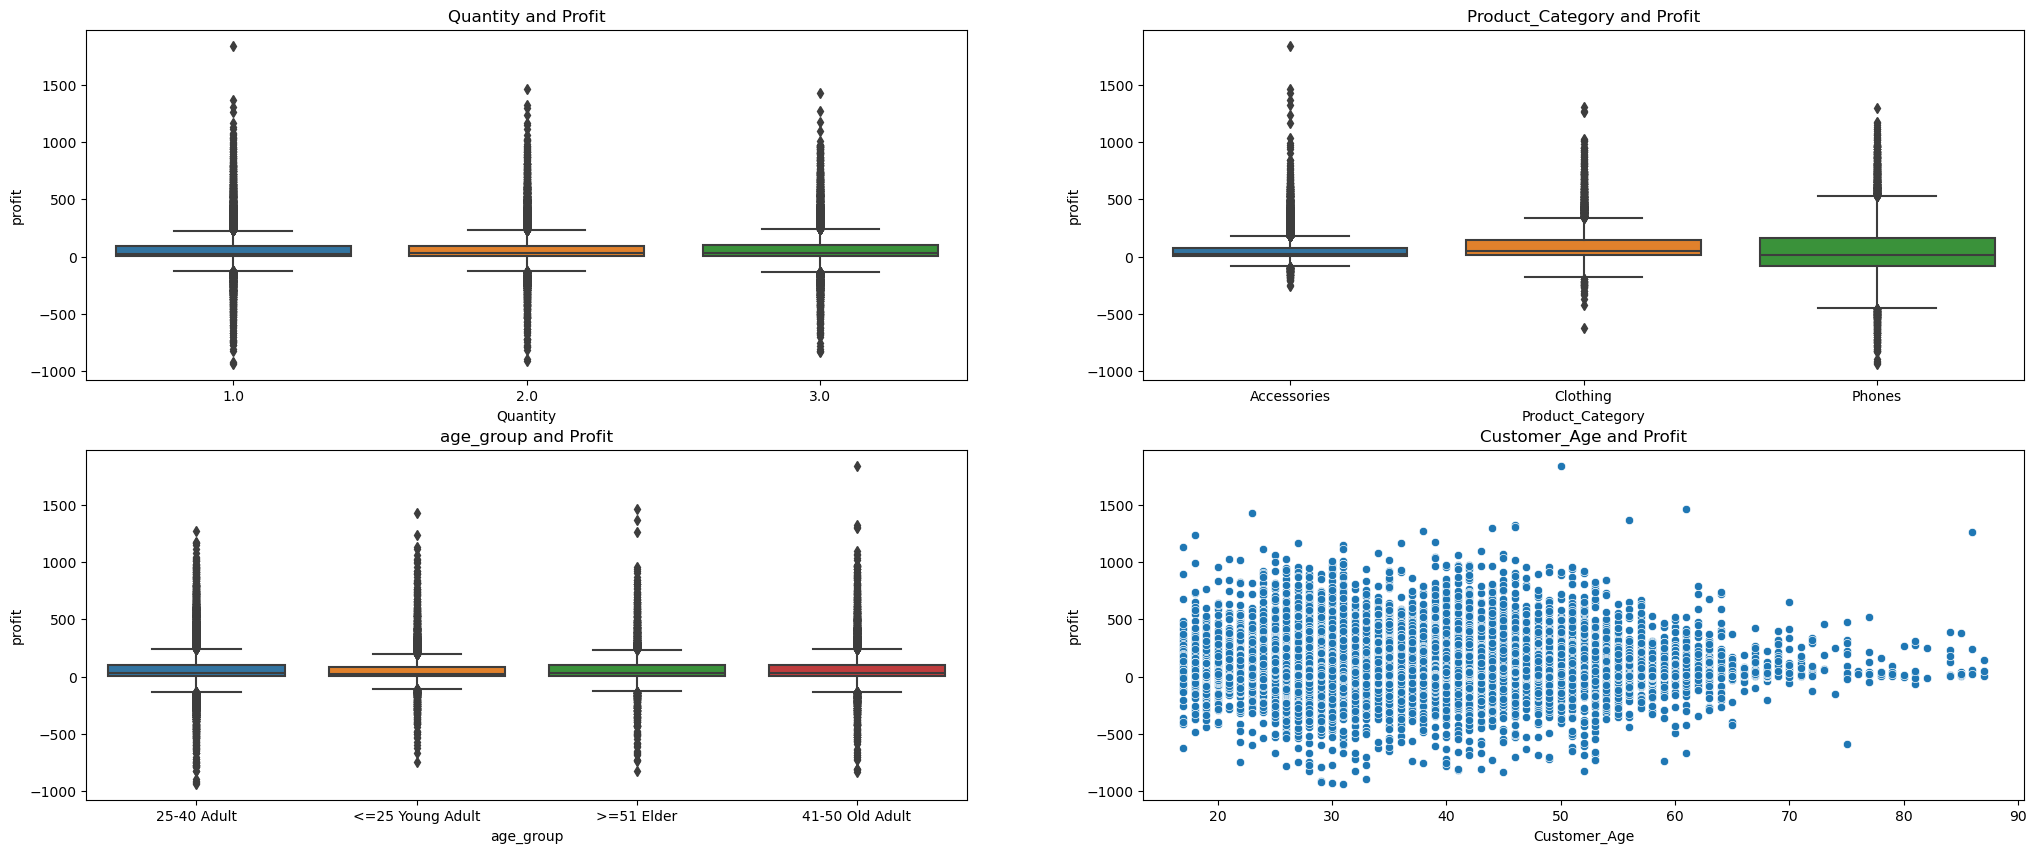

In [225]:
# Numerical Columns

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(25,10))

sns.boxplot(x='Quantity', y='profit', data=df, ax=axs[0,0])
axs[0,0].set_title("Quantity and Profit")

sns.boxplot(x='Product_Category', y='profit', data=df, ax=axs[0,1])
axs[0,1].set_title("Product_Category and Profit")

sns.boxplot(x='age_group', y='profit', data=df, ax=axs[1,0])
axs[1,0].set_title("age_group and Profit")

sns.scatterplot(x='Customer_Age', y='profit', data=df, ax=axs[1,1])
axs[1,1].set_title("Customer_Age and Profit");


###### Narration about your observations

### Multivariate Analysis

This involves analyzing the relationship between three or more variables. 

In [226]:
df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price', 'age_group', 'cost', 'revenue',
       'profit', 'profit_label'],
      dtype='object')

In [227]:
# Product Category against Cost, Revenue and Profit

procat = df.groupby("Product_Category")[["cost", "revenue", "profit"]].sum().reset_index()

In [228]:
procat

,Product_Category,cost,revenue,profit
0,Accessories,6041896.06,7420663.12,1378767.06
1,Clothing,2892324.94,3437556.95,545232.01
2,Phones,11148745.02,11486354.63,337609.61


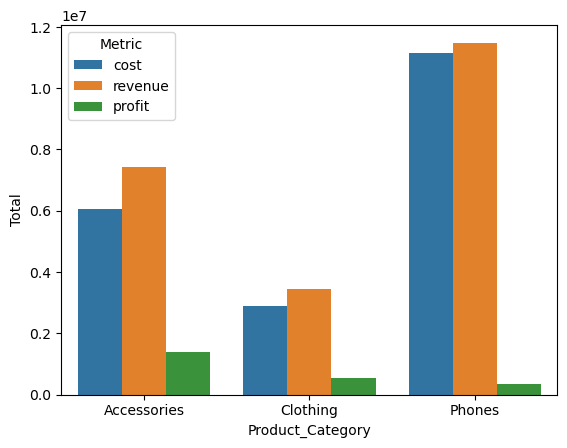

In [229]:
# Lets visualise

procat = df.groupby("Product_Category")[["cost", "revenue", "profit"]].sum().reset_index()
procat = pd.melt(procat, id_vars="Product_Category", var_name="Metric", value_name="Total")
sns.barplot(data=procat, x='Product_Category', y="Total", hue="Metric");

###### Narration about your observations

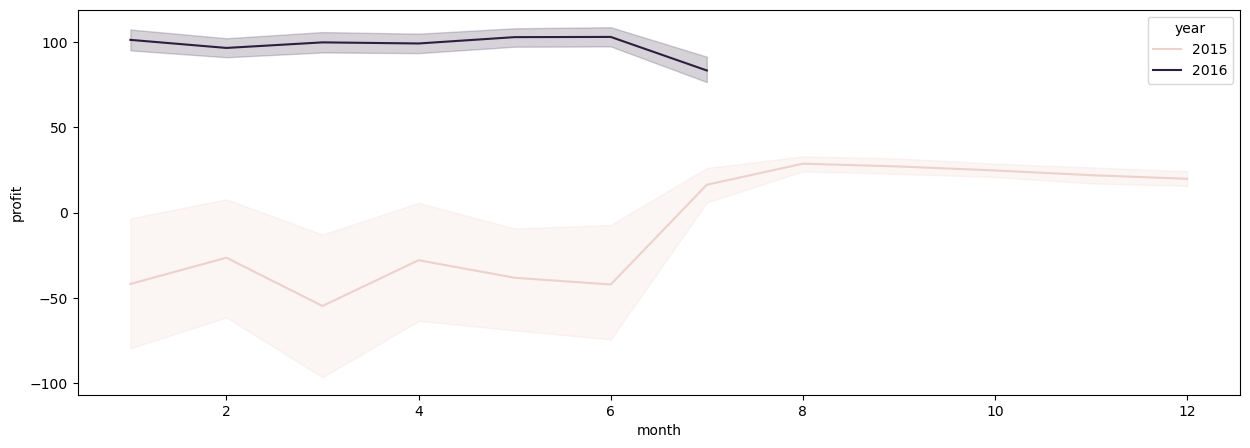

In [304]:
# Using a line chart to understand trends

plt.figure(figsize=(15,5))
sns.lineplot(x='month', y="profit", data=df, hue='year');

In [240]:
# Using pivot table
df.pivot_table(values='profit', index='year', columns='month', aggfunc='sum')

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2015,-5778.70,-4079.65,-8163.79,-4945.69,-7801.45,-8690.61,15104.47,65926.24,62172.33,62950.66,54480.9,67448.12
2016,280204.25,263640.18,299777.67,307746.51,356915.59,357549.86,107151.79,NaN,NaN,NaN,NaN,NaN


###### Narration about your observations

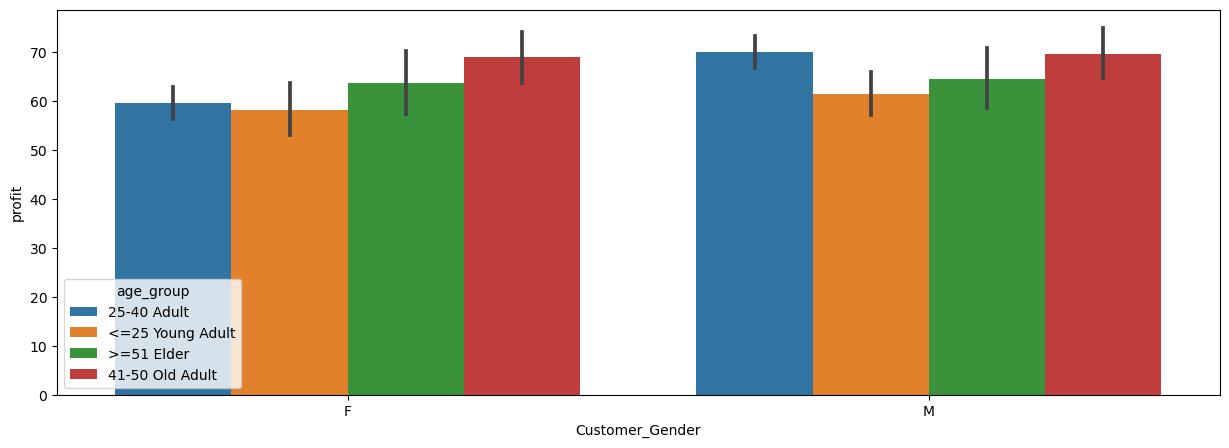

In [149]:
# Customer Gender, Age group and Profit
plt.figure(figsize=(15,5))
sns.barplot(x="Customer_Gender", y='profit', data=df, hue="age_group");

In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34866 entries, 0 to 34865
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              34866 non-null  datetime64[ns]
 1   Customer          34866 non-null  object        
 2   Sales Person      34866 non-null  object        
 3   Customer_Age      34866 non-null  int64         
 4   Customer_Gender   34866 non-null  object        
 5   State             34866 non-null  object        
 6   Product_Category  34866 non-null  object        
 7   Sub_Category      34866 non-null  object        
 8   Payment Option    34866 non-null  object        
 9   Quantity          34866 non-null  float64       
 10  Unit_Cost         34866 non-null  float64       
 11  Unit_Price        34866 non-null  float64       
 12  year              34866 non-null  int32         
 13  month             34866 non-null  int32         
 14  month_name        34866 non

In [298]:
a = df.corr(numeric_only=True)

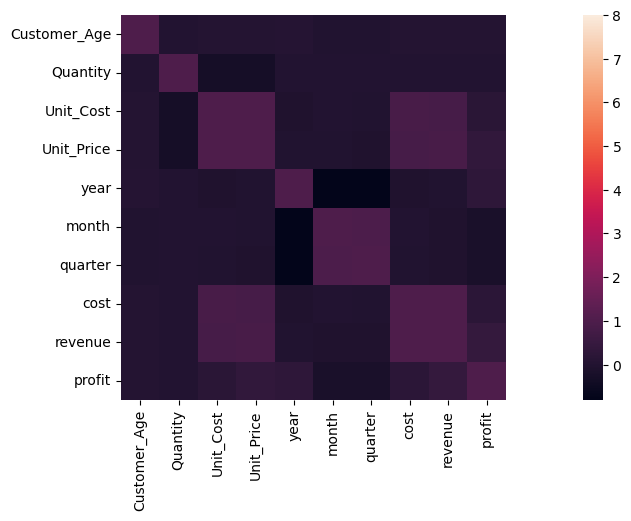

In [300]:
# Correlation
a = df.corr(numeric_only=True)
plt.figure(figsize=(20,5))
sns.heatmap(a, vmax=8, square=True);

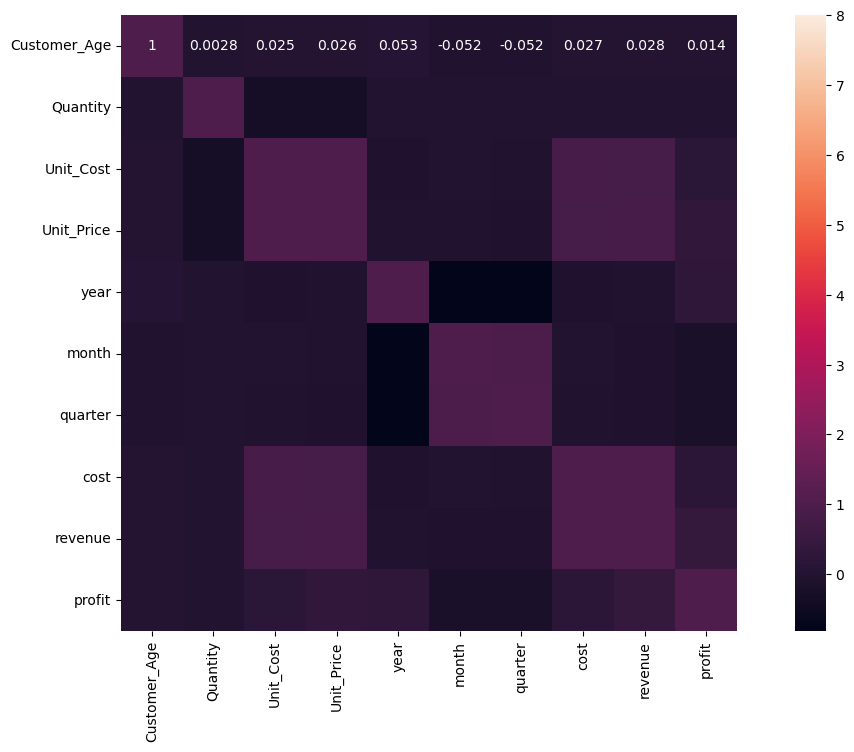

In [301]:
# Correlation
a = df.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(15,8))
sns.heatmap(a, vmax=8, square=True, annot=True);

###### Narration about your observations

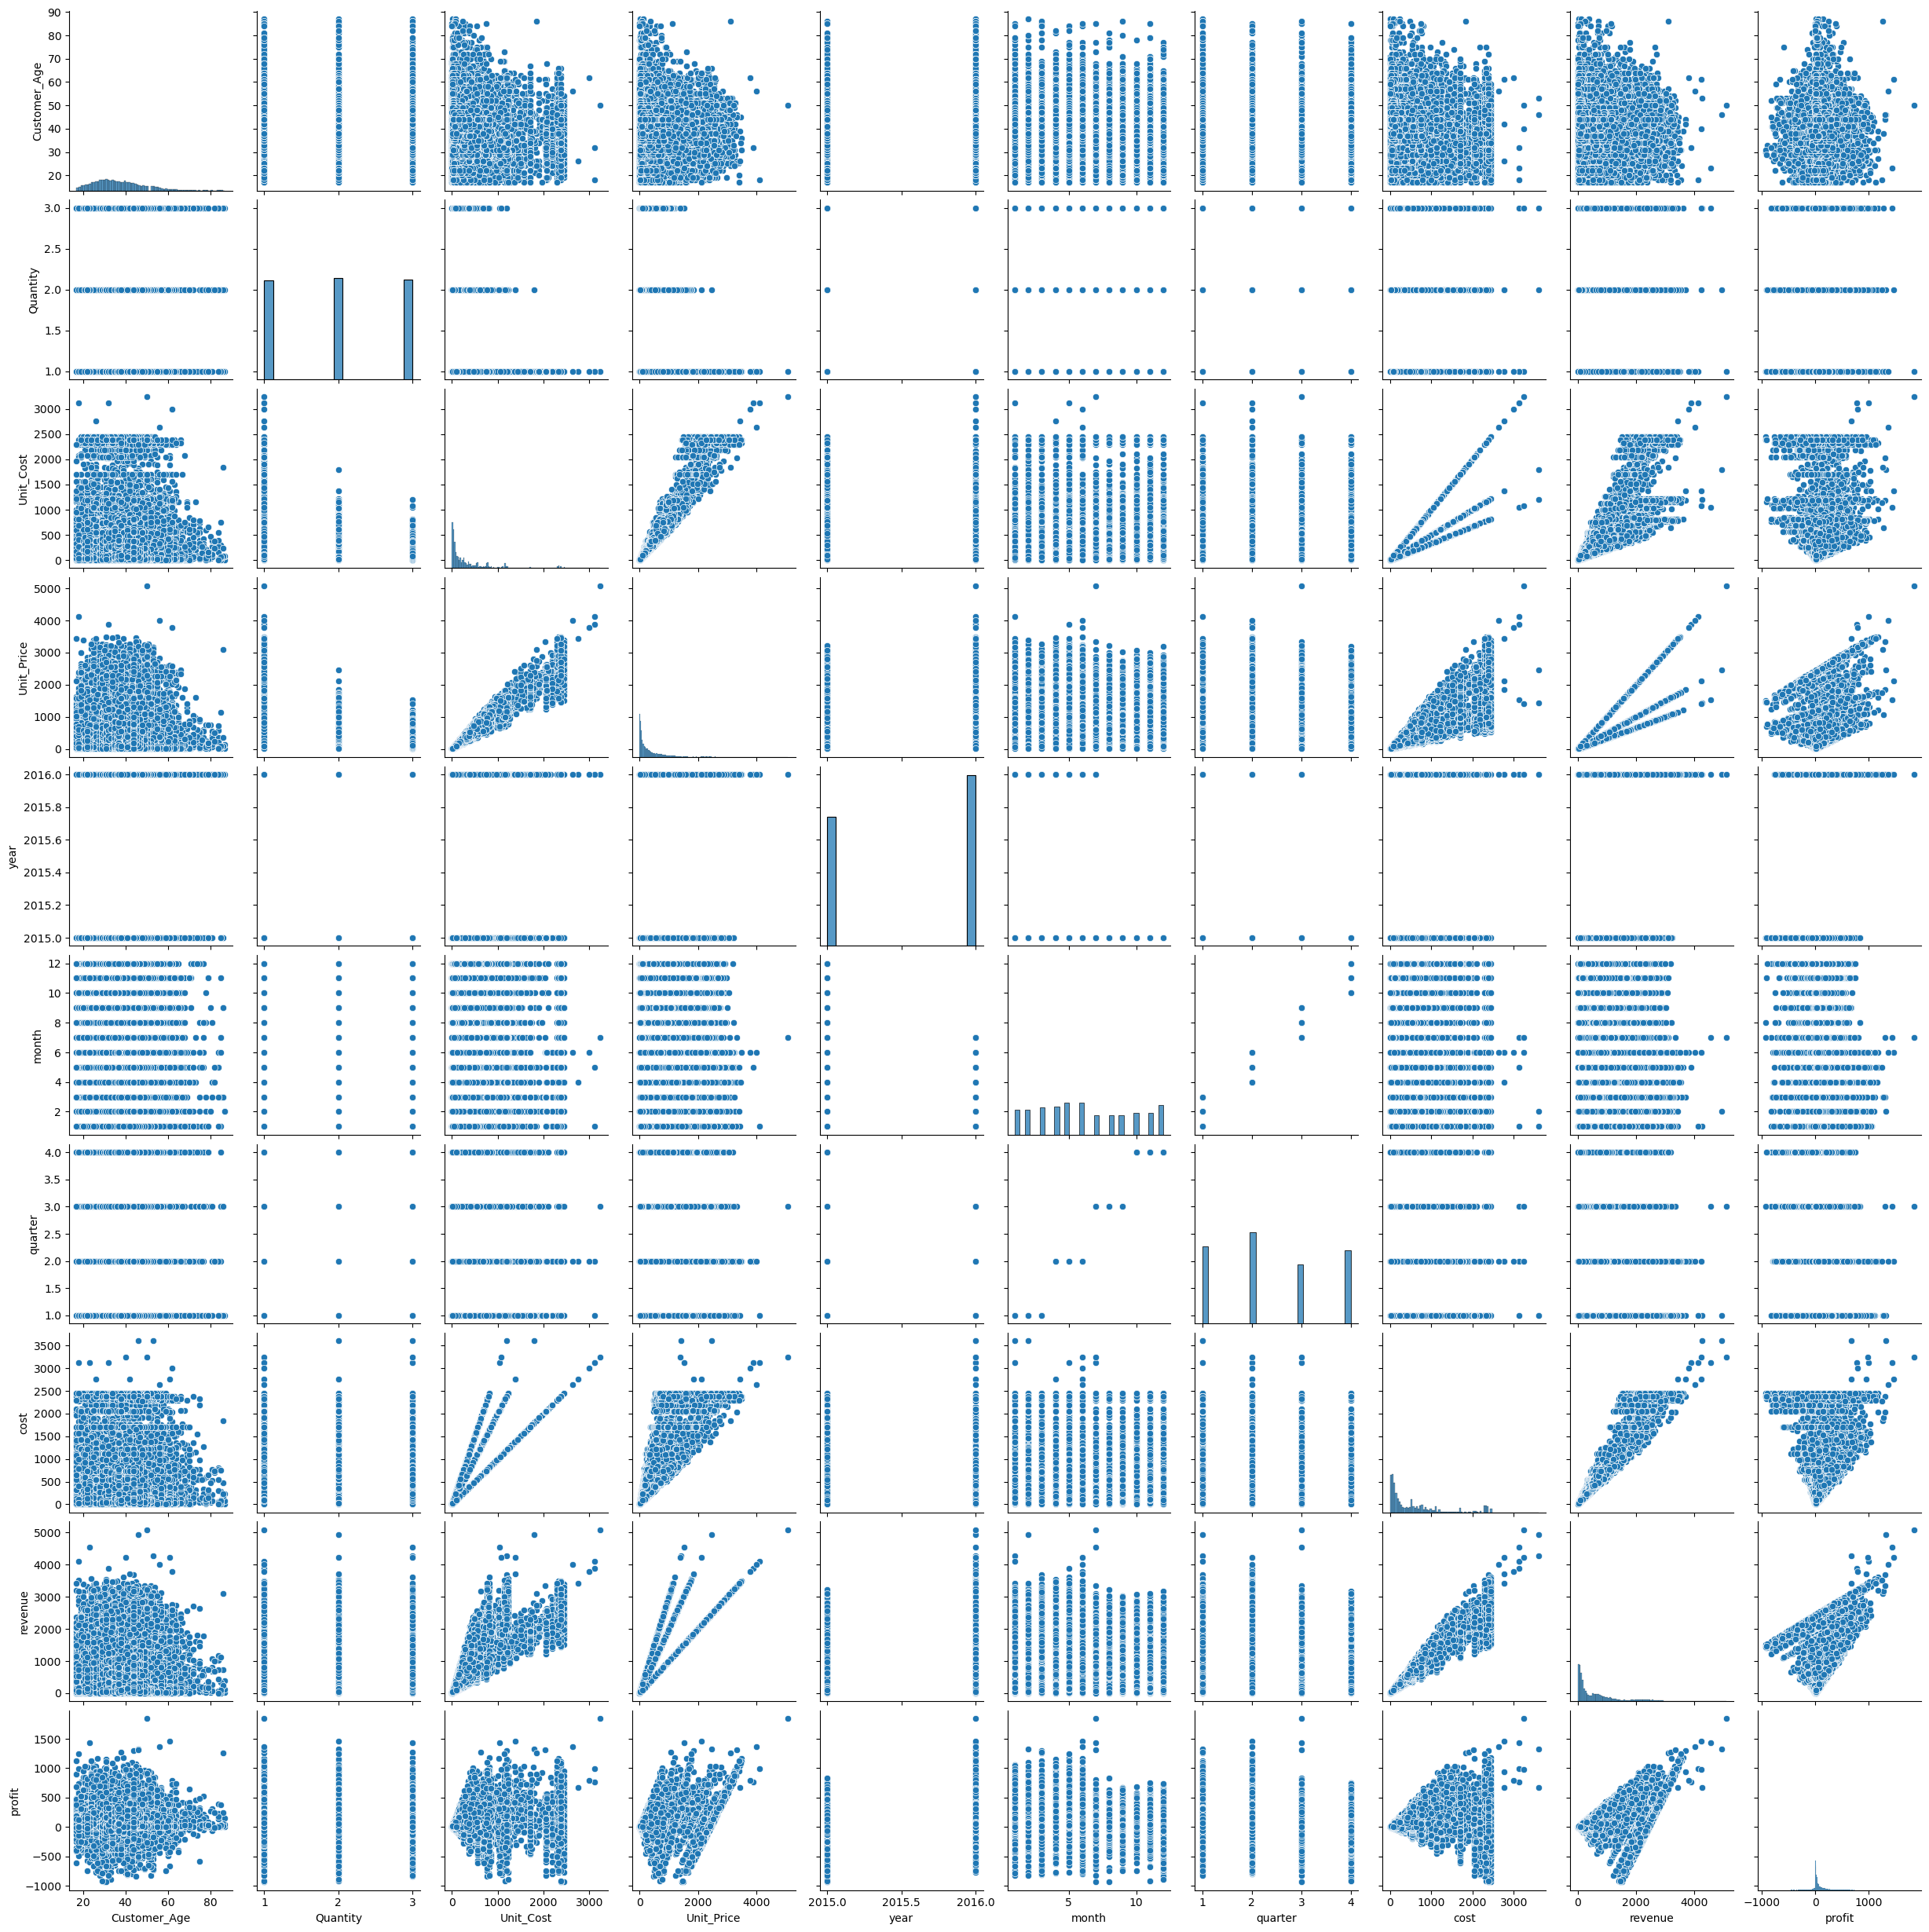

In [305]:
sns.pairplot(df, height=2.5);

###### Narration about your observations